<a href="https://www.kaggle.com/code/shag2003/knn-algorithms?scriptVersionId=172899906" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing all the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt

In [2]:
dataset = pd.read_csv('/kaggle/input/phishing-urls/Preprocessed_data.csv')
dataset.head()

,login_form,links_in_tags,iframe,popup_window,safe_anchor,onmouseover,right_clic,whois_registered_domain,domain_registration_length,domain_age,...,having_ip_address,no_of_dots,no_of_sensitive_words,out_of_position_tld,https_token,url_length,tinyURL,prefixSuffix,count_special_chars,status
0,0,80.000000,0,0,0.0,0,0,0,45,-1,...,1,3,0,1,-1,37,-1,-1,7,legitimate
1,0,100.000000,0,0,100.0,0,0,0,77,5767,...,1,1,0,1,-1,77,-1,-1,7,phishing
2,0,100.000000,0,0,100.0,0,0,0,14,4004,...,1,4,1,-1,1,126,-1,1,19,phishing
3,0,100.000000,0,0,62.5,0,0,0,62,-1,...,1,2,0,1,-1,18,-1,-1,5,legitimate
4,1,76.470588,0,0,0.0,0,0,0,224,8175,...,1,2,0,1,-1,55,-1,-1,10,legitimate


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
y = np.where(y == "phishing", 1, -1)
y

array([-1,  1,  1, ..., -1, -1,  1])

## Splitting the dataset into the Training set and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

In [6]:
print(X_train)

[[  0.           0.           0.         ...  -1.          -1.
   11.        ]
 [  0.          64.70588235   0.         ...  -1.          -1.
    6.        ]
 [  0.          77.77777778   0.         ...   1.          -1.
    9.        ]
 ...
 [  0.           0.           0.         ...  -1.          -1.
   14.        ]
 [  0.         100.           0.         ...  -1.          -1.
    8.        ]
 [  0.           0.           0.         ...  -1.          -1.
   10.        ]]


In [7]:
print(y_train)

[ 1  1 -1 ...  1  1  1]


In [8]:
print(X_test)

[[  0.          75.           0.         ...  -1.          -1.
    6.        ]
 [  0.           0.           0.         ...  -1.          -1.
   10.        ]
 [  0.           0.           0.         ...  -1.          -1.
    6.        ]
 ...
 [  0.           0.           0.         ...  -1.          -1.
    8.        ]
 [  0.         100.           0.         ...  -1.          -1.
    5.        ]
 [  0.          93.33333333   0.         ...   1.          -1.
   10.        ]]


In [9]:
print(y_test)

[-1  1  1 ...  1 -1  1]


In [10]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test) #avoid data leakage

## Function to generate metrics for Algorithm (Precision, Recall, F1_score, Accuracy)

In [11]:
def calculate_metrics(actual, predicted):
    if not isinstance(predicted, np.ndarray):
        predicted = np.array(predicted)
    matrix = np.zeros((2, 2))
    n_samples = actual.shape[0]
    for i in range(n_samples):
        if actual[i] == predicted[i] and actual[i] == 1:
            matrix[0, 0] += 1  # True Positive
        elif actual[i] == predicted[i]:
            matrix[1, 1] += 1  # True Negative
        elif predicted[i] == 1:
            matrix[0, 1] += 1  # False Positive
        else:
            matrix[1, 0] += 1  # False Negative
    
    # Calculate precision, recall, and F1 score
    precision = matrix[0,0] / (matrix[0,0] + matrix[0,1]) if (matrix[0,0] + matrix[0,1]) > 0 else 0
    recall = matrix[0,0] / (matrix[0,0] + matrix[1,0]) if (matrix[0,0] + matrix[1,0]) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = np.sum(np.diag(matrix)) / np.sum(matrix) 

    labels = ['Actual Positive', 'Actual Negative']
    print("\t\tPredicted Positive\tPredicted Negative")
    for i, row_label in enumerate(labels):
        print(f"{row_label}\t\t{int(matrix[i,0])}\t\t\t{int(matrix[i,1])}")

    # Print precision, recall, and F1 score
    print("\nPrecision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Accuracy:", accuracy)

    # Plotting the confusion matrix
    plt.figure(figsize=(4, 4))
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Actual Pos', 'Actual Neg'])
    plt.yticks(tick_marks, ['Pred Positive', 'Pred Negative'])

    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, matrix[i, j], horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# K-Nearest Neighbors (KNN) Algorithm

K-nearest neighbors (KNN) is a simple and versatile classification algorithm. It is a non-parametric method used for both classification and regression tasks. In this algorithm, the classification of a data point is determined by the majority class among its k nearest neighbors in the feature space.

## Algorithm Overview

1. **Initialize**: Choose the value of $k$, the number of nearest neighbors to consider.
2. **Train**: Store all the training data.
3. **Predict**:
   - For each new data point:
     - Compute the distance between the new data point and all points in the training set.
     - Identify the $k$ nearest neighbors based on the computed distances.
     - Assign the class label by majority vote among the $k$ neighbors (for classification) or compute the average (for regression).

## Distance Metric

The choice of distance metric is crucial in KNN. Common distance metrics include:

- **Euclidean Distance**:
  $$
  \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
  $$
- **Manhattan Distance**:
  $$
  \sum_{i=1}^{n}|x_i - y_i|
  $$
- **Minkowski Distance**:
  $$
  \left(\sum_{i=1}^{n}|x_i - y_i|^p\right)^{\frac{1}{p}}
  $$

## Hyperparameters

- **$k$**: Number of nearest neighbors to consider.
- **Distance Metric**: Choice of distance metric used to measure similarity.

## Mathematical Notation

- $X$: Training data with features $X_i$ and labels $y_i$, where $i = 1, 2, ..., n$.
- $x$: New data point to be classified.
- $k$: Number of nearest neighbors.
- $d(x, X_i)$: Distance metric between data point $x$ and $X_i$.
- $N_k(x)$: Set of $k$ nearest neighbors of $x$.

### Prediction for Classification

$$
\hat{y}(x) = \text{argmax}_c \sum_{i \in N_k(x)} I(y_i = c)
$$

where $I(\cdot)$ is the indicator function.

### Prediction for Regression

$$
\hat{y}(x) = \frac{1}{k} \sum_{i \in N_k(x)} y_i
$$

## Pros and Cons

**Pros**:
- Simple and intuitive.
- No training phase, making it computationally efficient during testing.
- Effective for small to medium-sized datasets and when decision boundaries are irregular.

**Cons**:
- Computationally expensive during testing, especially with large datasets.
- Sensitive to irrelevant or redundant features.
- Requires careful selection of the distance metric and value of $k$.


## Training the classic kNN model on the Training set

In [12]:
class ClassicKNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[]#calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get first k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [13]:
classicModel=ClassicKNN(4) #our model
classicModel.fit(X_train,y_train)
classicKNN_pred=classicModel.predict(X_test) # our model's predictions

4


		Predicted Positive	Predicted Negative
Actual Positive		1953			409
Actual Negative		333			1877

Precision: 0.8268416596104996
Recall: 0.8543307086614174
F1 Score: 0.8403614457831325
Accuracy: 0.8377077865266842


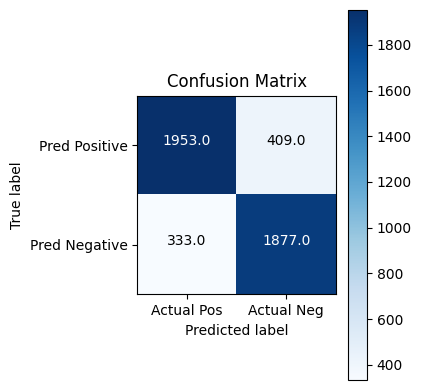

In [14]:
calculate_metrics(y_test,classicKNN_pred)

#### We will explore different variants of KNN to improve the metrics

# Fuzzy k-Nearest Neighbors (Fuzzy KNN) Algorithm

Fuzzy k-nearest neighbors (Fuzzy KNN) is an extension of the traditional KNN algorithm, which incorporates fuzzy membership functions to assign weights to each neighbor based on its distance from the query point. This algorithm is particularly useful when dealing with noisy or ambiguous data, as it allows for a more flexible classification approach.

## Algorithm Overview

1. **Initialize**: Choose the value of $k$, the number of nearest neighbors to consider, and the fuzzifier parameter $\lambda$.
2. **Train**: Store all the training data.
3. **Predict**:
   - For each new data point:
     - Compute the fuzzy membership values for each training data point based on its distance from the query point.
     - Calculate the weighted class labels using the fuzzy membership values and the class labels of the training data points.
     - Assign the class label by aggregating the weighted class labels.

## Fuzzy Membership Function

The fuzzy membership function assigns a degree of membership to each data point based on its distance from the query point. Common fuzzy membership functions include Gaussian, triangular, and trapezoidal functions.

## Hyperparameters

- **$k$**: Number of nearest neighbors to consider.

## Mathematical Notation

- $X$: Training data with features $X_i$ and labels $y_i$, where $i = 1, 2, ..., n$.
- $x$: New data point to be classified.
- $k$: Number of nearest neighbors.
- $d(x, X_i)$: Distance metric between data point $x$ and $X_i$.
- $\mu_i$: Fuzzy membership value of data point $X_i$.

### Fuzzy Membership Calculation

The fuzzy membership value $\mu_i$ of a data point $X_i$ is calculated using a fuzzy membership function $f$:

$$
\mu_i = f(d(x, X_i))
$$

### Weighted Class Label Calculation

The weighted class label $\hat{y}(x)$ for a query point $x$ is calculated by combining the class labels of the $k$ nearest neighbors with their corresponding fuzzy membership values:

$$
\hat{y}(x) = \frac{\sum_{i=1}^{k} \mu_i \cdot y_i}{\sum_{i=1}^{k} \mu_i}
$$

## Pros and Cons

**Pros**:
- Robust to noisy or ambiguous data.
- Allows for a more flexible classification approach compared to traditional KNN.
- Can handle data with varying degrees of relevance.

**Cons**:
- Requires careful selection of the fuzzifier parameter $\lambda$.
- Computationally more expensive compared to traditional KNN, especially with large datasets.
- Performance highly depends on the choice of fuzzy membership function and distance metric.


In [15]:
class FuzzyKNN:
    def __init__(self, k):
        self.k = k  # Number of nearest neighbors to consider
    
    def fit(self, X_train, y_train):
        """
        Fit the Fuzzy KNN model to the training data.

        Parameters:
        - X_train (array-like): Training data features.
        - y_train (array-like): Training data labels.
        """
        self.X_train = X_train  # Training data features
        self.y_train = y_train  # Training data labels
    
    def predict(self, X_test):
        """
        Predict the labels for the test data.

        Parameters:
        - X_test (array-like): Test data features.

        Returns:
        - y_pred (list): Predicted labels for the test data.
        """
        y_pred = []  # Initialize list to store predicted labels for test data
        for x in X_test:  # Iterate over each test sample
            # Calculate distances from the test sample to all training samples
            distances = np.linalg.norm(self.X_train - x, axis=1)
            # Find indices of k nearest neighbors
            nearest_neighbor_indices = np.argsort(distances)[:self.k]
            # Get labels of k nearest neighbors
            nearest_neighbor_labels = [self.y_train[idx] for idx in nearest_neighbor_indices]
            # Calculate membership values for each nearest neighbor
            membership_values = []
            for d in distances[nearest_neighbor_indices]:
                if d != 0:
                    # Avoid division by zero, handle the case when distance is zero
                    membership_values.append(1 / d)
                else:
                    # If distance is zero, assign infinite membership value
                    membership_values.append(float('inf'))
            # Calculate membership-weighted counts for each class label
            label_counts = {}
            for label, membership in zip(nearest_neighbor_labels, membership_values):
                if label in label_counts:
                    label_counts[label] += membership
                else:
                    label_counts[label] = membership
            # Predict the class label with maximum weighted count
            prediction = max(label_counts, key=label_counts.get)
            y_pred.append(prediction)  # Store the predicted label
        return y_pred

In [16]:
fuzzyModel = FuzzyKNN(k=4)  # Define the number of nearest neighbors (k)
fuzzyModel.fit(X_train, y_train)  # Train the model
fuzzy_pred = fuzzyModel.predict(X_test)  # Make predictions

		Predicted Positive	Predicted Negative
Actual Positive		2000			406
Actual Negative		286			1880

Precision: 0.8312551953449709
Recall: 0.8748906386701663
F1 Score: 0.8525149190110827
Accuracy: 0.8486439195100612


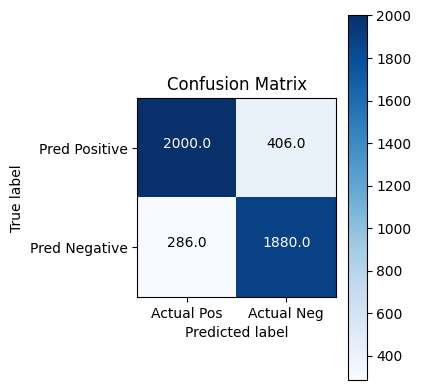

In [17]:
calculate_metrics(y_test,fuzzy_pred)

## Weight Adjusted KNN Algorithm

The Weight Adjusted KNN algorithm is a variant of the classic K-nearest neighbors (KNN) algorithm that incorporates attribute weighting. In Weight Adjusted KNN, instead of treating all nearest neighbors equally, the algorithm assigns weights to each neighbor based on a kernel function. These weights are used to adjust the influence of each neighbor in the classification process. Common kernel functions include inverse distance weighting, Gaussian kernel, or Epanechnikov kernel.

## 1. Inverse Distance Weighting (IDW) Kernel

The Inverse Distance Weighting (IDW) kernel assigns weights to data points based on their distance from the query point. The weight of each data point is inversely proportional to its distance from the query point. The IDW kernel is defined as:

$$
K(x, x_i) = \frac{1}{d(x, x_i)}
$$

where $d(x, x_i)$ is the distance between the query point $x$ and the data point $x_i$.

## 2. Gaussian Kernel

The Gaussian kernel is a popular choice due to its smoothness and continuous nature. It assigns weights to data points based on their distance from the query point, following a Gaussian (bell-shaped) distribution. The Gaussian kernel is defined as:

$$
K(x, x_i) = \exp\left(-\frac{||x - x_i||^2}{2\sigma^2}\right)
$$

where $||x - x_i||$ is the Euclidean distance between the query point $x$ and the data point $x_i$, and $\sigma$ is a bandwidth parameter controlling the width of the Gaussian.

## 3. Epanechnikov Kernel

The Epanechnikov kernel is a simple and efficient kernel that assigns weights to data points based on their distance from the query point. It has a quadratic profile and is zero beyond a certain distance from the query point. The Epanechnikov kernel is defined as:

$$
K(x, x_i) = \begin{cases}
\frac{3}{4}(1 - \frac{||x - x_i||^2}{r^2}), & \text{if } ||x - x_i|| < r \\
0, & \text{otherwise}
\end{cases}
$$

where $||x - x_i||$ is the Euclidean distance between the query point $x$ and the data point $x_i$, and $r$ is a bandwidth parameter controlling the range of the kernel.

#### Key Features:

- **Attribute Weighting:** Weight Adjusted KNN assigns weights to neighbors based on a kernel function, allowing it to give more importance to closer neighbors and less importance to farther neighbors.
- **Flexibility:** The choice of kernel function provides flexibility in adjusting the influence of neighbors based on distance.
- **Robustness to Noise:** By incorporating attribute weighting, Weight Adjusted KNN can reduce the impact of noisy or irrelevant features on the classification process.

#### Advantages:

- **Improved Performance:** Weight Adjusted KNN can potentially improve classification performance by giving more emphasis to relevant neighbors and reducing the influence of outliers.
- **Adaptability:** The choice of kernel function allows Weight Adjusted KNN to adapt to different datasets and classification tasks.
- **Interpretability:** The weights assigned to neighbors provide insights into the contribution of each neighbor to the classification decision.

#### Limitations:

- **Parameter Sensitivity:** Weight Adjusted KNN performance may depend on the choice of the `k` parameter and the kernel function.
- **Computational Complexity:** Computing weights for each neighbor can be computationally intensive, especially for large datasets and high-dimensional feature spaces.
- **Difficulty in Interpretation:** Interpreting the impact of different kernel functions and parameter choices on classification results may require experimentation and analysis.

In [18]:
class WeightAdjustedKNN:
    def __init__(self, k):
        """
        Initialize the WeightAdjustedKNN model.

        Parameters:
        - k (int): Number of nearest neighbors to consider.
        """
        self.k = k
    
    def fit(self, X_train, y_train):
        """
        Fit the WeightAdjustedKNN model to the training data.

        Parameters:
        - X_train (array-like): Training data features.
        - y_train (array-like): Training data labels.
        """
        self.X_train = X_train  # Training data features
        self.y_train = y_train  # Training data labels
    
    def _inverse_distance(self, distances):
        """
        Compute the inverse distance weights for the distances.

        Parameters:
        - distances (array-like): Array of distances from a test sample to training samples.

        Returns:
        - weights (array-like): Array of weights computed using the inverse distance.
        """
        return 1 / (distances + 1e-5)  # Avoid division by zero
    
    def _gaussian_kernel(self, distances, sigma=1.0):
        """
        Compute the Gaussian kernel weights for the distances.

        Parameters:
        - distances (array-like): Array of distances from a test sample to training samples.
        - sigma (float): Width parameter of the Gaussian kernel.

        Returns:
        - weights (array-like): Array of weights computed using the Gaussian kernel.
        """
        return np.exp(-(distances ** 2) / (2 * (sigma ** 2)))
    
    def _epanechnikov_kernel(self, distances):
        """
        Compute the Epanechnikov kernel weights for the distances.

        Parameters:
        - distances (array-like): Array of distances from a test sample to training samples.

        Returns:
        - weights (array-like): Array of weights computed using the Epanechnikov kernel.
        """
        return 3/4 * (1 - (distances ** 2))
    
    def predict(self, X_test, kernel='inverse_distance'):
        """
        Predict the labels for the test data.

        Parameters:
        - X_test (array-like): Test data features.
        - kernel (str): Type of kernel function to use ('inverse_distance', 'gaussian', or 'epanechnikov').

        Returns:
        - y_pred (list): Predicted labels for the test data.
        """
        y_pred = []  # Initialize list to store predicted labels for test data
        for x in X_test:  # Iterate over each test sample
            # Calculate distances from the test sample to all training samples
            distances = np.linalg.norm(self.X_train - x, axis=1)
            # Compute weights using the specified kernel function
            if kernel == 'inverse_distance':
                weights = self._inverse_distance(distances)
            elif kernel == 'gaussian':
                weights = self._gaussian_kernel(distances)
            elif kernel == 'epanechnikov':
                weights = self._epanechnikov_kernel(distances)
            else:
                raise ValueError("Invalid kernel function. Choose from 'inverse_distance', 'gaussian', or 'epanechnikov'.")
            # Find indices of k nearest neighbors
            nearest_neighbor_indices = np.argsort(distances)[:self.k]
            # Get labels of k nearest neighbors
            nearest_neighbor_labels = [self.y_train[idx] for idx in nearest_neighbor_indices]
            # Calculate weighted counts for each class label
            label_weights = {}
            for label, weight in zip(nearest_neighbor_labels, weights):
                if label in label_weights:
                    label_weights[label] += weight
                else:
                    label_weights[label] = weight
            # Predict the class label with maximum weighted count
            prediction = max(label_weights, key=label_weights.get)
            y_pred.append(prediction)  # Store the predicted label
        return y_pred


In [19]:
waModel = WeightAdjustedKNN(k=4)  # Define the number of nearest neighbors (k)
waModel.fit(X_train, y_train)  # Train the model

In [20]:
weightAdjusted_pred = waModel.predict(X_test, kernel='gaussian')  # Make predictions

		Predicted Positive	Predicted Negative
Actual Positive		1961			436
Actual Negative		325			1850

Precision: 0.8181059657905716
Recall: 0.857830271216098
F1 Score: 0.8374973307708734
Accuracy: 0.8335520559930009


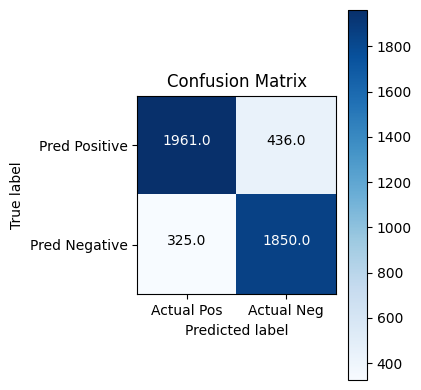

In [21]:
calculate_metrics(y_test, weightAdjusted_pred)

# Hassanat Distance Calculation

The Hassanat distance is a measure of dissimilarity between two samples, calculated by finding the maximum and minimum vector points between the two samples and then computing the Euclidean norm of their difference.

## Calculation Procedure

Let $x$ and $y$ be two samples with $n$ features.

1. **Find Maximum and Minimum Points**:
   - Compute the element-wise maximum $max\_vec$ and minimum $min\_vec$ vectors between the samples $x$ and $y$.
     $$
     max\_vec_i = \max(x_i, y_i) \quad \text{for } i = 1, 2, ..., n
     $$
     $$
     min\_vec_i = \min(x_i, y_i) \quad \text{for } i = 1, 2, ..., n
     $$

2. **Compute Euclidean Norm**:
   - Compute the Euclidean norm of the difference between the maximum and minimum vectors.
     $$
     Hassanat\_distance = ||max\_vec - min\_vec|| = \sqrt{\sum_{i=1}^{n} (max\_vec_i - min\_vec_i)^2}
     $$

The Hassanat distance captures the maximum spread between the two samples, providing a measure of their dissimilarity.

This distance metric is particularly useful in scenarios where the range of feature values varies significantly between samples and when capturing the overall spread is crucial for assessing dissimilarity.


In [22]:
class HassanatDistanceKNN:
    def __init__(self, k):
        """
        Initialize the HassanatDistanceKNN model.

        Parameters:
        - k (int): Number of nearest neighbors to consider.
        """
        self.k = k
    
    def fit(self, X_train, y_train):
        """
        Fit the HassanatDistanceKNN model to the training data.

        Parameters:
        - X_train (array-like): Training data features.
        - y_train (array-like): Training data labels.
        """
        self.X_train = X_train  # Training data features
        self.y_train = y_train  # Training data labels
    
    def _hassanat_distance(self, x1, x2):
        """
        Compute the Hassanat distance metric between two samples.

        Parameters:
        - x1 (array-like): Feature vector of the first sample.
        - x2 (array-like): Feature vector of the second sample.

        Returns:
        - distance (float): Hassanat distance between the two samples.
        """
        # Example implementation of Hassanat distance metric
        max_vector = np.maximum(x1, x2)  # Compute maximum vector element-wise
        min_vector = np.minimum(x1, x2)  # Compute minimum vector element-wise
        return np.linalg.norm(max_vector - min_vector)  # Compute Euclidean norm of the difference
    
    def predict(self, X_test):
        """
        Predict the labels for the test data.

        Parameters:
        - X_test (array-like): Test data features.

        Returns:
        - y_pred (list): Predicted labels for the test data.
        """
        y_pred = []  # Initialize list to store predicted labels for test data
        for x in X_test:  # Iterate over each test sample
            # Calculate Hassanat distances from the test sample to all training samples
            distances = [self._hassanat_distance(x, x_train) for x_train in self.X_train]
            # Find indices of k nearest neighbors
            nearest_neighbor_indices = np.argsort(distances)[:self.k]
            # Get labels of k nearest neighbors
            nearest_neighbor_labels = [self.y_train[idx] for idx in nearest_neighbor_indices]
            # Predict the class label based on majority voting among nearest neighbors
            prediction = max(set(nearest_neighbor_labels), key=nearest_neighbor_labels.count)
            y_pred.append(prediction)  # Store the predicted label
        return y_pred

In [ ]:
hassanatModel = HassanatDistanceKNN(k=4)  # Define the number of nearest neighbors (k)
hassanatModel.fit(X_train, y_train)  # Train the model
hassanat_pred = hassanatModel.predict(X_test)  # Make predictions

In [ ]:
calculate_metrics(y_test, hassanat_pred)

# Ensemble Approach KNN Algorithm

The Ensemble Approach KNN algorithm is a variant of the classic K-nearest neighbors (KNN) algorithm that utilizes an ensemble approach to address the issue of having a fixed "k" parameter for classification. Instead of using a single value of "k", this algorithm considers a range of "k" values and combines their predictions using a weighted summation approach.

## Algorithm Overview

1. **Initialize**: Choose a range of $k$ values and a weighting scheme.
2. **Train**: Store all the training data.
3. **Predict**:
   - For each new data point:
     - Compute predictions for each $k$ value in the range.
     - Apply weights to the predictions based on the weighting scheme.
     - Combine the weighted predictions to obtain the final prediction.

## Weighting Scheme

The weighting scheme determines how much influence each $k$ value has on the final prediction. Common weighting schemes include uniform weighting, where each $k$ value is given equal weight, and inverse distance weighting, where closer neighbors are given higher weight.

## Mathematical Notation

- $X$: Training data with features $X_i$ and labels $y_i$, where $i = 1, 2, ..., n$.
- $x$: New data point to be classified.
- $k$: Range of nearest neighbors to consider.
- $w_k$: Weight for each $k$ value in the range.
- $\hat{y}_{k}(x)$: Prediction for $k$ nearest neighbors.

### Prediction Combination

The final prediction $\hat{y}(x)$ is obtained by combining the predictions for each $k$ value using a weighted summation:

$$
\hat{y}(x) = \sum_{k} w_k \cdot \hat{y}_{k}(x)
$$

## Pros and Cons

**Pros**:
- More robust performance compared to using a fixed "k" parameter.
- Flexibility in handling different types of datasets and decision boundaries.
- Can capture both local and global patterns in the data.

**Cons**:
- Requires careful selection of the range of "k" values and weighting scheme.
- Computationally more expensive compared to traditional KNN due to considering multiple $k$ values.
- Performance may degrade if the range of "k" values is not properly chosen or if the weighting scheme is not appropriate.


In [ ]:
class EnsembleApproachKNN:
    def __init__(self, k_max):
        """
        Initialize the EnsembleApproachKNN model.

        Parameters:
        - k_max (int): Maximum value of k to consider for ensemble approach.
        """
        self.k_max = k_max
    
    def fit(self, X_train, y_train):
        """
        Fit the EnsembleApproachKNN model to the training data.

        Parameters:
        - X_train (array-like): Training data features.
        - y_train (array-like): Training data labels.
        """
        self.X_train = X_train  # Training data features
        self.y_train = y_train  # Training data labels
    
    def _inverse_logarithm(self, k):
        """
        Compute the inverse logarithm weight for a given k value.

        Parameters:
        - k (int): Value of k.

        Returns:
        - weight (float): Weight computed using the inverse logarithm.
        """
        return 1 / np.log(k + 1)
    
    def predict(self, X_test):
        """
        Predict the labels for the test data.

        Parameters:
        - X_test (array-like): Test data features.

        Returns:
        - y_pred (list): Predicted labels for the test data.
        """
        y_pred = []  # Initialize list to store predicted labels for test data
        for x in X_test:  # Iterate over each test sample
            all_distances = np.linalg.norm(self.X_train - x, axis=1)  # Calculate distances to all training samples
            sorted_indices = np.argsort(all_distances)  # Sort indices based on distances
            k_values = np.arange(1, self.k_max + 1, 2)  # Generate odd values of k from 1 to k_max
            weights = [self._inverse_logarithm(k) for k in k_values]  # Compute weights using inverse logarithm
            label_counts = {}  # Initialize dictionary to store label counts weighted by k
            for k, weight in zip(k_values, weights):  # Iterate over k values and weights
                nearest_neighbor_indices = sorted_indices[:k]  # Get indices of k nearest neighbors
                nearest_neighbor_labels = [self.y_train[idx] for idx in nearest_neighbor_indices]  # Get labels of k nearest neighbors
                for label in nearest_neighbor_labels:  # Update label counts with weighted values
                    if label in label_counts:
                        label_counts[label] += weight
                    else:
                        label_counts[label] = weight
            prediction = max(label_counts, key=label_counts.get)  # Predict the class label with maximum weighted count
            y_pred.append(prediction)  # Store the predicted label
        return y_pred

In [ ]:
eaModel = EnsembleApproachKNN(k_max=10)  # Define the maximum value of k
eaModel.fit(X_train, y_train)  # Train the model
ensembleApproach_pred = eaModel.predict(X_test)  # Make predictions

In [ ]:
calculate_metrics(y_test, ensembleApproach_pred)

## Testing with Scikit Learn (Standard KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)#The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

print(confusion_matrix(y_test, y_pred))
print("\nPrecision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

## Comparing the metrics of all the above variants

In [ ]:
def compare_metrics(actual, predicted):
    if not isinstance(predicted, np.ndarray):
        predicted = np.array(predicted)
    matrix = np.zeros((2, 2))
    n_samples = actual.shape[0]
    for i in range(n_samples):
        if actual[i] == predicted[i] and actual[i] == 1:
            matrix[0, 0] += 1  # True Positive
        elif actual[i] == predicted[i]:
            matrix[1, 1] += 1  # True Negative
        elif predicted[i] == 1:
            matrix[0, 1] += 1  # False Positive
        else:
            matrix[1, 0] += 1  # False Negative
    
    # Calculate precision, recall, and F1 score
    precision = matrix[0,0] / (matrix[0,0] + matrix[0,1]) if (matrix[0,0] + matrix[0,1]) > 0 else 0
    recall = matrix[0,0] / (matrix[0,0] + matrix[1,0]) if (matrix[0,0] + matrix[1,0]) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = np.sum(np.diag(matrix)) / np.sum(matrix) 

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score
    }

# Calculate metrics for each model
classic_metrics = compare_metrics(y_test,classicKNN_pred)
standard_metrics = compare_metrics(y_test,y_pred)
fuzzy_metrics = compare_metrics(y_test,fuzzy_pred)
weight_adjusted_metrics = compare_metrics(y_test, weightAdjusted_pred)
hassanat_metrics = compare_metrics(y_test, hassanat_pred)
ensemble_metrics = compare_metrics(y_test, ensembleApproach_pred)

# Organize the results into a DataFrame
data = {
    "Model": ["Classic KNN", "Standard KNN", "Fuzzy KNN", "Weight Adjusted KNN", "Hassanat KNN", "Ensemble Approach KNN"],
    "Accuracy": [classic_metrics["Accuracy"], standard_metrics["Accuracy"], fuzzy_metrics["Accuracy"], 
                 weight_adjusted_metrics["Accuracy"], hassanat_metrics["Accuracy"], ensemble_metrics["Accuracy"]],
    "Precision": [classic_metrics["Precision"], standard_metrics["Precision"], fuzzy_metrics["Precision"], 
                  weight_adjusted_metrics["Precision"], hassanat_metrics["Precision"], ensemble_metrics["Precision"]],
    "Recall": [classic_metrics["Recall"], standard_metrics["Recall"], fuzzy_metrics["Recall"], 
               weight_adjusted_metrics["Recall"], hassanat_metrics["Recall"], ensemble_metrics["Recall"]],
    "F1 Score": [classic_metrics["F1 Score"], standard_metrics["F1 Score"], fuzzy_metrics["F1 Score"], 
                 weight_adjusted_metrics["F1 Score"], hassanat_metrics["F1 Score"], ensemble_metrics["F1 Score"]]
}

df = pd.DataFrame(data)
df

## Visualization of the observations of all the variants

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming metrics for four models are stored in lists
model_names = ['Classic KNN', 'Fuzzy KNN', 'Weight Adjusted KNN', 'Hassanat KNN', 'Ensemble Approach KNN']
accuracies = [classic_metrics["Accuracy"], fuzzy_metrics["Accuracy"], 
              weight_adjusted_metrics["Accuracy"], hassanat_metrics["Accuracy"], ensemble_metrics["Accuracy"]]
f1_scores = [classic_metrics["F1 Score"], fuzzy_metrics["F1 Score"], 
             weight_adjusted_metrics["F1 Score"], hassanat_metrics["F1 Score"], ensemble_metrics["F1 Score"]]
precisions = [classic_metrics["Precision"], fuzzy_metrics["Precision"], 
              weight_adjusted_metrics["Precision"], hassanat_metrics["Precision"], ensemble_metrics["Precision"]]
recalls = [classic_metrics["Recall"], fuzzy_metrics["Recall"], 
           weight_adjusted_metrics["Recall"], hassanat_metrics["Recall"], ensemble_metrics["Recall"]]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the grouped bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracies, color='blue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, f1_scores, color='orange', width=bar_width, edgecolor='grey', label='F1 Score')
plt.bar(r3, precisions, color='green', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r4, recalls, color='red', width=bar_width, edgecolor='grey', label='Recall')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(model_names))], model_names, rotation=30)

# Add ylabel and title
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Metrics for Different KNN Variants')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()